## Mechanical Properties Dataset

These data come from:
Borg, C. K. H. et. al. Expanded dataset of mechanical properties and observed phases of multi-principal element alloys. _Scientific Data_ 7:430, 2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.composition import ElementProperty

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("mechanical_properties_raw.csv")

In [4]:
unused_cols = [
    "IDENTIFIER: Reference ID",
    "PROPERTY: Microstructure",
    "PROPERTY: grain size ($\mu$m)",
    "PROPERTY: Exp. Density (g/cm$^3$)",
    "PROPERTY: Calculated Density (g/cm$^3$)",
    "PROPERTY: Calculated Young modulus (GPa)",
    "PROPERTY: HV",
    "PROPERTY: Elongation plastic (%)",
    "PROPERTY: Exp. Young modulus (GPa)",
    "PROPERTY: O content (wppm)",
    "PROPERTY: N content (wppm)",
    "PROPERTY: C content (wppm)",
    "REFERENCE: doi",
    "REFERENCE: year",
    "REFERENCE: title"
]
df = df.drop(labels=unused_cols, axis="columns")

In [5]:
room_temp = (20.0 <= df["PROPERTY: Test temperature ($^\circ$C)"]) & (df["PROPERTY: Test temperature ($^\circ$C)"] <= 25.0)
df_room_temp = df.loc[room_temp]

In [6]:
df_all_data = df_room_temp.dropna(
    subset=["FORMULA", "PROPERTY: Type of test", "PROPERTY: Processing method", "PROPERTY: BCC/FCC/other"]
).drop(labels=["PROPERTY: Test temperature ($^\circ$C)"], axis="columns")

In [7]:
df_final = df_all_data.groupby(by=["FORMULA", "PROPERTY: Processing method", "PROPERTY: BCC/FCC/other", "PROPERTY: Type of test"]).mean().reset_index()

In [8]:
df_final = StrToComposition().featurize_dataframe(df_final, "FORMULA")

StrToComposition:   0%|          | 0/510 [00:00<?, ?it/s]

In [9]:
df_final

,FORMULA,PROPERTY: Processing method,PROPERTY: BCC/FCC/other,PROPERTY: Type of test,PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),composition
0,Al0.05 Cr0.5 Fe1 Mn0.625 Ni0.375,CAST,other,C,354.000000,NaN,NaN,"(Al, Cr, Fe, Mn, Ni)"
1,Al0.053 Cu1 Mn1 Ni1,CAST,FCC,C,330.000000,NaN,45.000000,"(Al, Cu, Mn, Ni)"
2,Al0.1 Co1 Cr1 Fe1 Mn1 Ni1,CAST,other,C,1631.000000,NaN,NaN,"(Al, Co, Cr, Fe, Mn, Ni)"
3,Al0.1 Co1 Cr1 Fe1 Ni1,WROUGHT,FCC,T,917.000000,928.000000,18.850000,"(Al, Co, Cr, Fe, Ni)"
4,Al0.108 Co0.514 Cr0.514 Cu0.108 Fe0.514 Ni1,WROUGHT,FCC,T,719.000000,1048.000000,30.000000,"(Al, Co, Cr, Cu, Fe, Ni)"
5,Al0.108 Co0.514 Cr0.514 Cu0.108 Fe0.514 Ni1,WROUGHT,other,T,460.000000,732.000000,32.000000,"(Al, Co, Cr, Cu, Fe, Ni)"
6,Al0.111 Cu1 Mn1 Ni1,CAST,other,C,515.000000,NaN,40.000000,"(Al, Cu, Mn, Ni)"
7,Al0.125 Co1 Cr1 Cu1 Fe1 Mn1 Ni1 Ti1 V1,CAST,other,C,1862.000000,2431.000000,1.000000,"(Al, Co, Cr, Cu, Fe, Mn, Ni, Ti, V)"
8,Al0.143 Cr0.343 Fe1 Mn0.8 Ni0.571,CAST,FCC,T,766.500000,974.000000,27.390000,"(Al, Cr, Fe, Mn, Ni)"
9,Al0.15 Cr0.5 Cu0.25 Fe0.5 Ni1,WROUGHT,FCC,T,62.000000,169.000000,98.000000,"(Al, Cr, Cu, Fe, Ni)"


In [10]:
def make_scatter(df, x_key, y_key, color_key):
    data = df.dropna(subset = [x_key, y_key])
    num_points = len(data)
    groups = data.groupby(color_key)
    for name, group in groups:
        plt.scatter(group[x_key], group[y_key], label=name)
    plt.title(f"{num_points} points")
    plt.xlabel(x_key)
    plt.ylabel(y_key)
    plt.legend()
    plt.show()

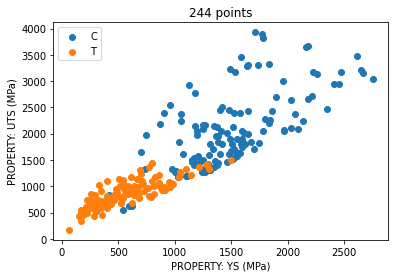

In [11]:
make_scatter(df_final, "PROPERTY: YS (MPa)", "PROPERTY: UTS (MPa)", "PROPERTY: Type of test")

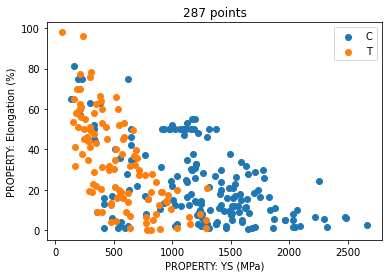

In [12]:
make_scatter(df_final, "PROPERTY: YS (MPa)", "PROPERTY: Elongation (%)", "PROPERTY: Type of test")

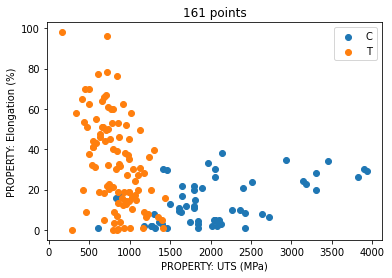

In [13]:
make_scatter(df_final, "PROPERTY: UTS (MPa)", "PROPERTY: Elongation (%)", "PROPERTY: Type of test")

In [14]:
df_trial = df_final\
    .dropna(subset=["PROPERTY: YS (MPa)", "PROPERTY: Elongation (%)"])\
    .drop("PROPERTY: UTS (MPa)", axis="columns")

In [15]:
df_featurized = ElementProperty.from_preset(preset_name="magpie").featurize_dataframe(df_trial, col_id="composition")

ElementProperty:   0%|          | 0/287 [00:00<?, ?it/s]

In [42]:
excluded = ["FORMULA", "composition"]
df_ml = df_featurized.drop(excluded, axis=1)

In [43]:
df_ml.to_csv("src/main/resources/mechanical_properties_clean.csv", sep=",", index=False)

In [44]:
df_ml

,PROPERTY: Processing method,PROPERTY: BCC/FCC/other,PROPERTY: Type of test,PROPERTY: YS (MPa),PROPERTY: Elongation (%),MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
1,CAST,FCC,C,330.000000,45.000000,13.0,29.0,16.0,27.084507,1.854560,25.0,52.0,73.0,21.0,59.243040,4.744867,5